In [ ]:
# Programmer: Ratna Kapoor
## Bar Plot of School Performance Versus School Safety 

In [49]:
#%matplotlib inline
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
Safety_data_to_load = "../Resources/SchoolSafety_1314.csv"
Performance_data_to_load = "../Resources/SchoolPerfomance_1314.csv"


In [50]:
# Read the School Safety and School Performance data

Safety_data = pd.read_csv(Safety_data_to_load)
Performance_data = pd.read_csv(Performance_data_to_load)

In [51]:
# Combine the data into a single dataset
school_complete_df = pd.merge(Safety_data, Performance_data, left_on=["NTA", "DBN"], right_on=["NTA","DBN"])

school_complete_df.head(5)

,School Year_x,Building Code,DBN,Location Code,Location Name,Major Crime,Other Crime,Non Criminal,Property Crime,Violent Crime,NTA,Grad_rate,Coll_rate,School Year_y
0,2013-14,K405,22K405,K405,Midwood High School,3.0,11.0,2.0,12.0,2.0,Flatbush,0.89,0.74,2013-14
1,2013-14,K425,22K425,K425,James Madison High School,2.0,8.0,26.0,1.0,5.0,Madison,0.76,0.63,2013-14
2,2013-14,K430,13K430,K430,Brooklyn Technical High School,2.0,6.0,8.0,3.0,0.0,Fort Greene,0.98,0.91,2013-14
3,2013-14,K485,20K485,K485,High School of Telecommunication Arts and Tec...,0.0,3.0,2.0,2.0,0.0,Bay Ridge,0.87,0.70,2013-14
4,2013-14,K490,20K490,K490,Fort Hamilton High School,1.0,10.0,7.0,9.0,1.0,Bay Ridge,0.68,0.58,2013-14


In [52]:
school_df = school_complete_df.groupby(["NTA"])


school_summary = pd.DataFrame({'Grad_rate' :   round(school_df["Grad_rate"].mean(),2),
                               'Coll_rate' :   round(school_df["Coll_rate"].mean(),2),                                   
                               'Total_crime':  (school_df["Major Crime"].sum() +  school_df["Other Crime"].sum() + school_df["Non Criminal"].sum() + school_df["Property Crime"].sum() + school_df["Violent Crime"].sum())                                
                              }) 
                                                
school_summary.head(5)

,Grad_rate,Coll_rate,Total_crime
NTA,,,
Astoria,0.66,0.44,55.0
Auburndale,0.86,0.74,16.0
Baisley Park,0.74,0.50,27.0
Battery Park City-Lower Manhattan,0.80,0.65,42.0
Bay Ridge,0.78,0.64,35.0


In [53]:
top_schools = school_summary.sort_values(["Grad_rate"], ascending=False)
ts = top_schools.head(10)
ts

,Grad_rate,Coll_rate,Total_crime
NTA,,,
Jamaica,1.00,0.89,2.0
Lenox Hill-Roosevelt Island,1.00,0.89,1.0
Van Cortlandt Village,1.00,0.96,8.0
Lincoln Square,0.99,0.80,13.0
Fort Greene,0.98,0.91,19.0
Bedford,0.98,0.79,4.0
Hudson Yards-Chelsea-Flatiron-Union Square,0.97,0.83,32.0
Richmond Hill,0.95,0.74,10.0
Clinton Hill,0.95,0.79,5.0


## Bar Plot of School Performance Vs School Safety


<IPython.core.display.Javascript object>


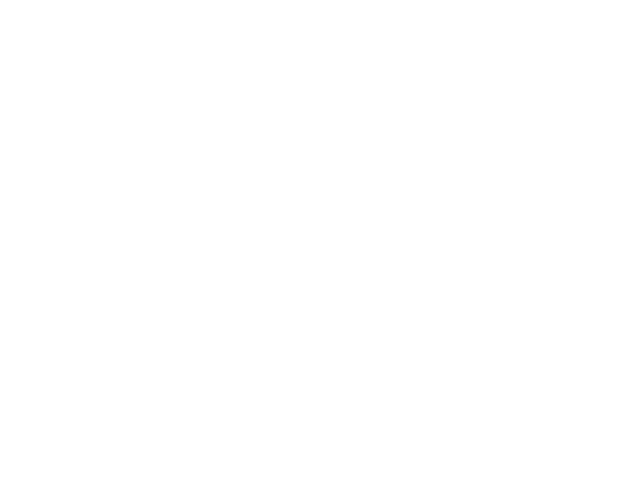

In [58]:
#Create a School Performance Bar Plot for Top 10 

N = 10
Gscore = ts["Grad_rate"] * 100
Cscore = ts["Coll_rate"] * 100
Crime_score = ts["Total_crime"]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Gscore, width, yerr=Crime_score)
p2 = plt.bar(ind, Cscore, width, bottom=Gscore)

plt.ylabel('Scores')
plt.xlabel('List of NTAs')
plt.title('Top 10 NTAs - Performance Vs Crime \n', color='green', fontsize=12)
plt.xticks(ind, ('Lenox Hill-Roosevelt Island', 'Jamaica', 'Van Cortlandt Village', 'Lincoln Square', 'Fort Greene', 'Bedford','Hudson Yards-Chelsea-Flatiron','Richmond Hill','Clinton Hill','Bushwick North'), fontsize=6, rotation=30)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Grad Rate', 'College Rate'))

plt.show()
#plt.tight_layout()
plt.savefig('../Images/School_Top_Performance.png')
plt.close()

In [59]:
#Get the Low perfromance schools versus school Crime rate 
top_schools = school_summary.sort_values(["Grad_rate"], ascending=False)
ts = top_schools.tail(10)
ts

,Grad_rate,Coll_rate,Total_crime
NTA,,,
Port Richmond,0.67,0.43,70.0
Crown Heights North,0.67,0.62,18.0
Claremont-Bathgate,0.66,0.44,31.0
Astoria,0.66,0.44,55.0
Bushwick South,0.64,0.46,7.0
Williamsburg,0.64,0.33,2.0
East Tremont,0.62,0.41,38.0
Ridgewood,0.58,0.38,32.0
Pelham Parkway,0.57,0.34,18.0


<IPython.core.display.Javascript object>


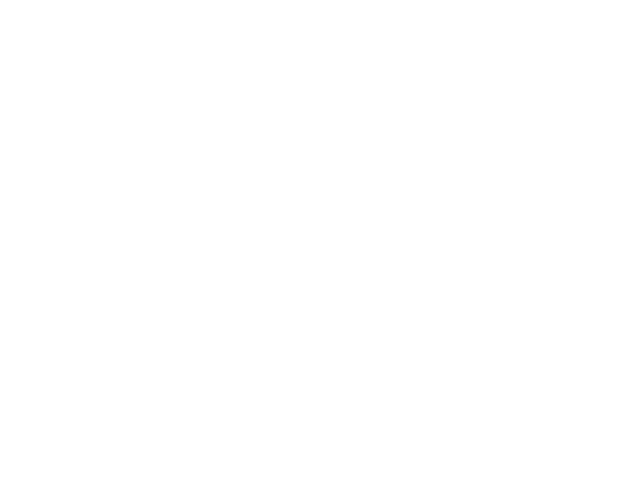

In [61]:
N = 10
Gscore = ts["Grad_rate"]*100
Cscore = ts["Coll_rate"]*100
Crime_score = ts["Total_crime"]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Gscore, width, yerr=Crime_score)
p2 = plt.bar(ind, Cscore, width, bottom=Gscore)

plt.ylabel('Scores')
plt.xlabel('List of NTAs')
plt.title('Lowest 10 NTAs - Performance Vs Crime \n', color='green', fontsize=12)
plt.xticks(ind, ('Port Richmond', 'Crown Heights North', 'Claremont', 'Astoria', 'Williamsburg', 'Bushwick south','East Tremont','Ridgewood','Pelham','East NY'), fontsize=6, rotation=30)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Grad Rate', 'College Rate'))

plt.show()
plt.tight_layout()
plt.savefig('../Images/School_Low_Performance.png')
plt.close()

## Total Incidents in NYC Schools by Crime Type
what are some of the most likely major impacts on school performance. 
•	Crime (within the schools) – more incidents in the school would typically mean that there are more distractions and less time for learning


In [62]:
Safety_data.head(5)

,School Year,Building Code,DBN,Location Code,Location Name,Major Crime,Other Crime,Non Criminal,Property Crime,Violent Crime,NTA
0,2013-14,K001,15K001,K001,P.S. 001 The Bergen,0.0,2.0,1.0,1.0,0.0,Sunset Park West
1,2013-14,K002,0,0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,1.0,5.0,2.0,2.0,4.0,Prospect Lefferts Gardens-Wingate
2,2013-14,K003,13K003,K003,P.S. 003 The Bedford Village,2.0,0.0,0.0,2.0,0.0,Clinton Hill
3,2013-14,K005,16K005,K005,P.S. 005 Dr. Ronald Mcnair,1.0,1.0,0.0,2.0,0.0,Stuyvesant Heights
4,2013-14,K006,17K006,K006,P.S. 006,0.0,1.0,2.0,0.0,0.0,Erasmus


In [63]:
major        =  Safety_data["Major Crime"].sum()
Other        =  Safety_data["Other Crime"].sum()
Non_Criminal =  Safety_data["Non Criminal"].sum()
Property     = Safety_data["Property Crime"].sum()
Violent      =  Safety_data["Violent Crime"].sum()


In [64]:
crimes = ["Major", "Other", "Non Criminal", "Property", "Violent"]

crime_in_schools = [major, Other, Non_Criminal, Property, Violent]
x_axis = np.arange(len(crime_in_schools))

print(crime_in_schools)

[652.0, 2473.0, 3776.0, 1592.0, 1073.0]


<IPython.core.display.Javascript object>


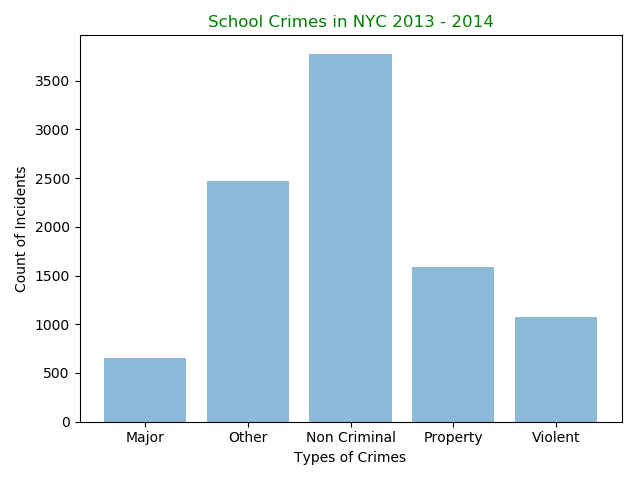

In [65]:
plt.bar(x_axis, crime_in_schools, align='center', alpha=0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, crimes)

# Give the chart a title, x label, and y label
plt.title("School Crimes in NYC 2013 - 2014", color='green', fontsize=12)
plt.xlabel("Types of Crimes")
plt.ylabel("Count of Incidents")

plt.tight_layout()
plt.show()

In [66]:
# Save the Figure 
plt.savefig("../Images/SchoolCrimes_201314.png")


## Performance Averages

In [11]:
Performance_data.head(10)

,DBN,Grad_rate,Coll_rate,NTA,School Year
0,31R455,85.0,66.0,Annadale-Huguenot-Prince's Bay-Eltingville,2013-14
1,30Q445,69.0,46.0,Astoria,2013-14
2,30Q450,63.0,43.0,Astoria,2013-14
3,30Q501,98.0,80.0,Astoria,2013-14
4,25Q285,95.0,80.0,Auburndale,2013-14
5,26Q430,86.0,74.0,Auburndale,2013-14
6,28Q690,74.0,50.0,Baisley Park,2013-14
7,02M316,77.0,62.0,Battery Park City-Lower Manhattan,2013-14
8,02M418,99.0,88.0,Battery Park City-Lower Manhattan,2013-14
9,02M425,64.0,41.0,Battery Park City-Lower Manhattan,2013-14


In [12]:
grad_avg = round(Performance_data["Grad_rate"].mean(), 2)
coll_avg = round(Performance_data["Coll_rate"].mean(), 2)

In [13]:
Perf = ["Grad Rates", "College Rates"]

perf_in_schools = [grad_avg , coll_avg]
x_axis = np.arange(len(perf_in_schools))

print(perf_in_schools)

[73.47, 53.57]


<IPython.core.display.Javascript object>


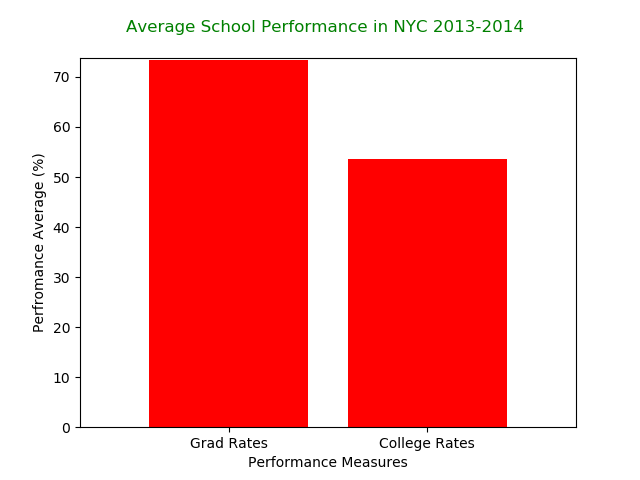

In [16]:
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(perf_in_schools)+0.4)

plt.bar(x_axis, perf_in_schools, color="red", align="center" )
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Perf)


In [ ]:
plt.title("Average School Performance in NYC 2013-2014 \n", color='green', fontsize=12)
plt.xlabel("Performance Measures")
plt.ylabel("Perfromance Average (%)")

plt.show()
plt.savefig("SchoolPerformance_201314.png")